## Vehicle Detection and Tracking Project Writeup

### 1. Read the images from the car and non-car datasets

Once the car and non-car dataset was downloaded from the links provided in the Udacity Classroom, the image file names were read and stored in car_images and noncar_images variables. 

A set of 16 random images from both the datasets were visualized as follows: 

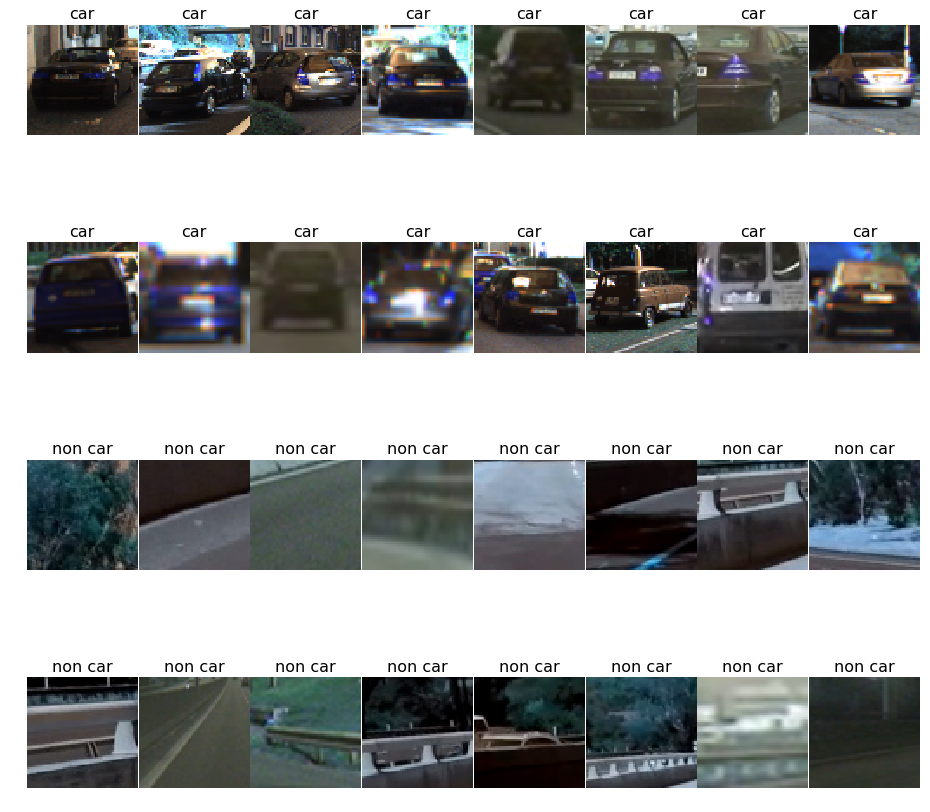

### 2. Function to extract the HOG features of a given image

This function takes in an image as the argument and returns a Histogram of Oriented Gradients. 

This basically finds the shape of the object(s) in the image. 

A sample image was run as follows: 

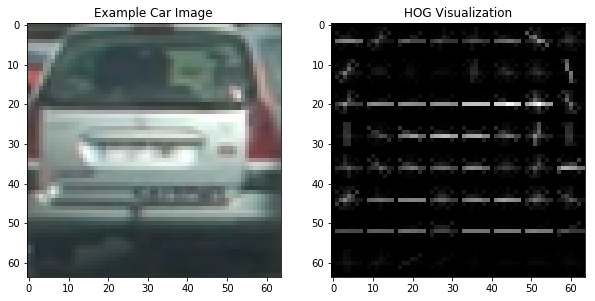

### 3. Function to compute the Color Histogram

This function takes in an image and the number of bins and extracts the image histogram on each of the three layers and ravels the array to be stored as a feature vector. 

A viualizaiton of the oringinal image vs the histogram of the three channels is shown below: 

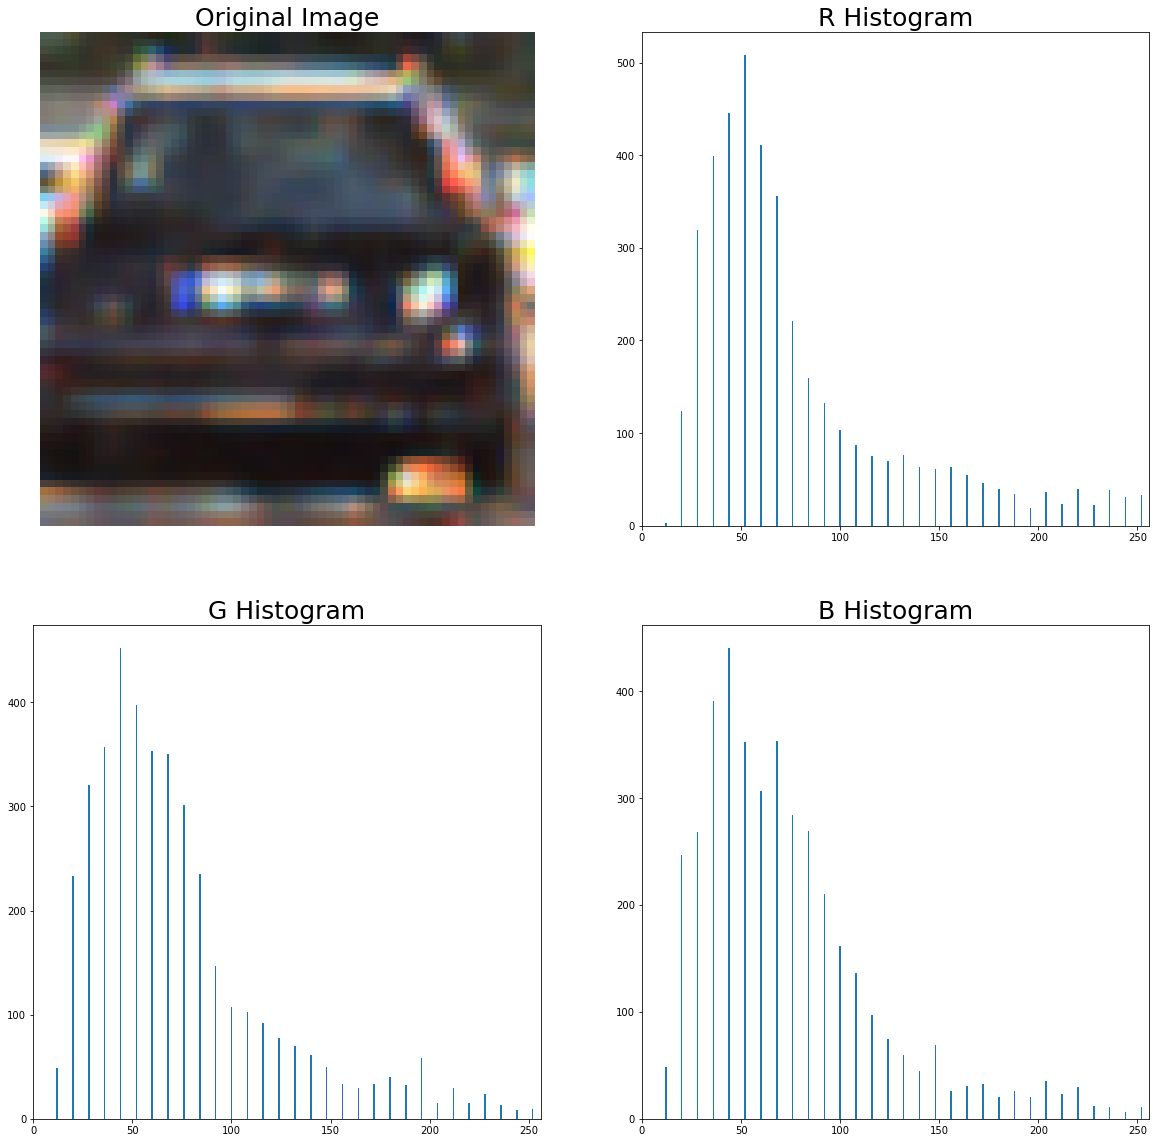

### 4. Function to Extract Raw Color features

This function takes in an image, color space and the resize shape as the arguments and resizes any input image to the small resize shape. 

The raw pixels of the color space image are used as features of the image. 

### 5. Combine features

extract_features is a function that accepts multiple images, color space and lets the user activate multiple features such as hist_feat, HOG, spatial_bin.

This allows the user to use features in different combinations and test the accuracy of the classifer. 

### 6. Train a SVM classifier 

Now that we have a combined feature vector for multiple images, we train SVM classifier to detect car and non_car images. 

This function also performs feature scaling before training and shuffling and splitting of training and test set. 

#### 1. Training using HOG + Spatial_feature of the image gives a test set accuracy of 96.99% 

##### 2. Training using all features of the image (HOG, spatial_feature, hist_color) of the image gives a test set accuracy of 98.59% 

### 7. Sliding Window 

This function takes in an image as the argument along with the start and stop position of the sliding window and implements the sliding windows across this region

An example of this is shown below: 

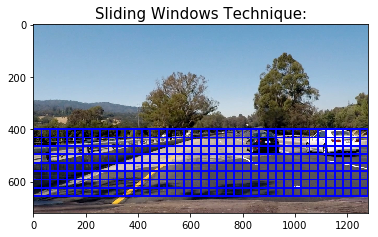

### 8. Extract features (single image)

This function is created to be able to extract features of the window on an image. This would then be used to predict if a car is contained in that specific window. 

### 9. Search windows

This is a function that accepts an image and windows. It then classifies the contents of the windows as containing car or not. 

As mentioned earlier, the test accuracy of the SVC is 98.59%

### 10. Applying Heat Maps and Rectangles

Once we have the image with multiple detections and false positives, we want to filter out unwanted detections. 

This is done using the simple and effective technique suggested in the Udacity modules. 

The hottest pixels in the heatmap are those that contain a consistent detection (most likely a vehicle in our case). 

The labels function from the scipy libraries is capable of separating objects in a heatmap. 

The labels is then used to find the largest bounding boxes for the respective objects. 

The threshold used in our case is 2. 

Some Heat map and car detection images are as follows: 

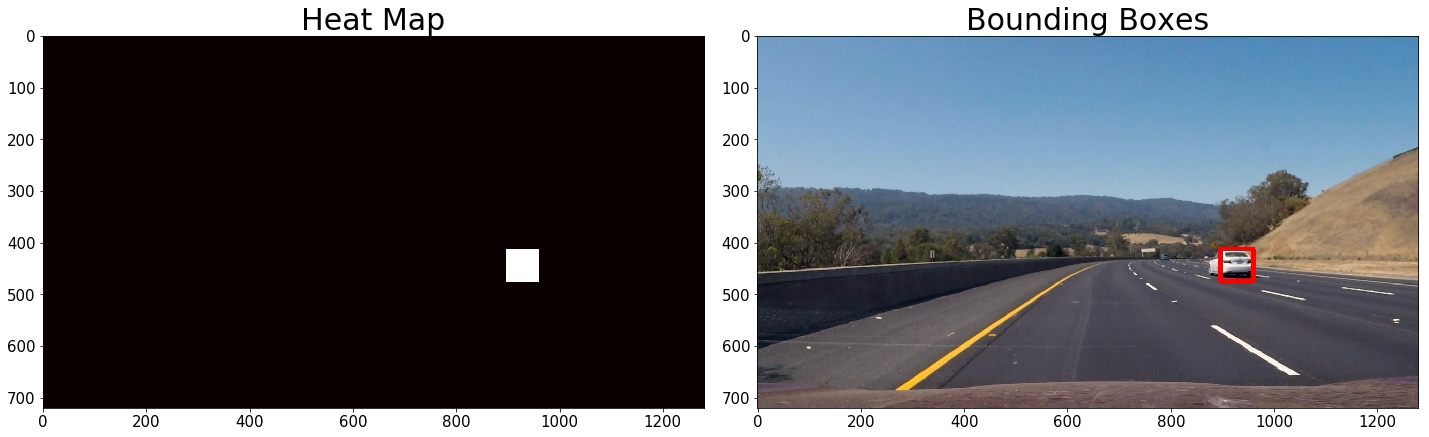
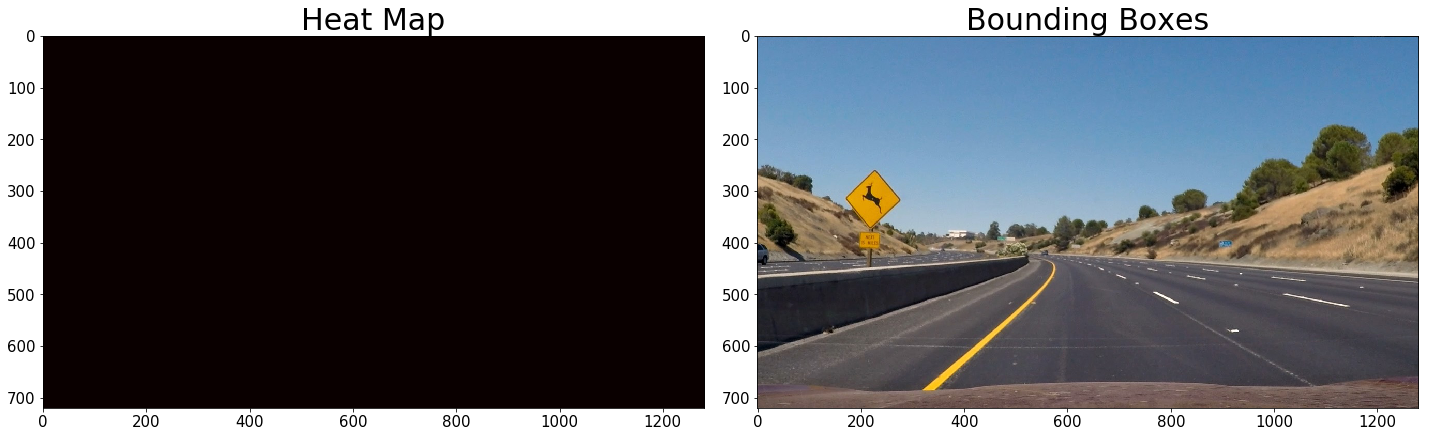
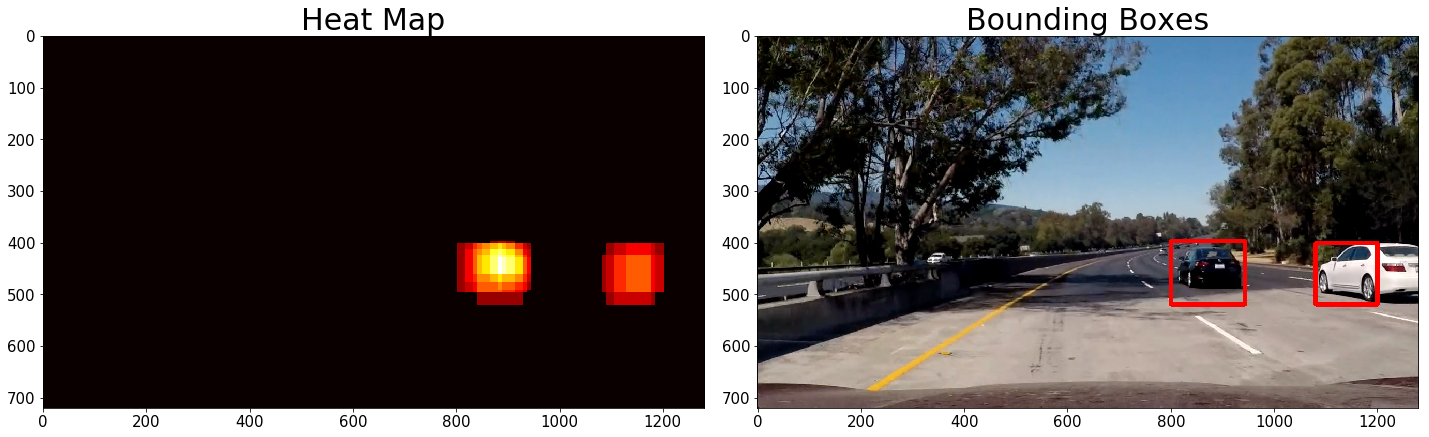
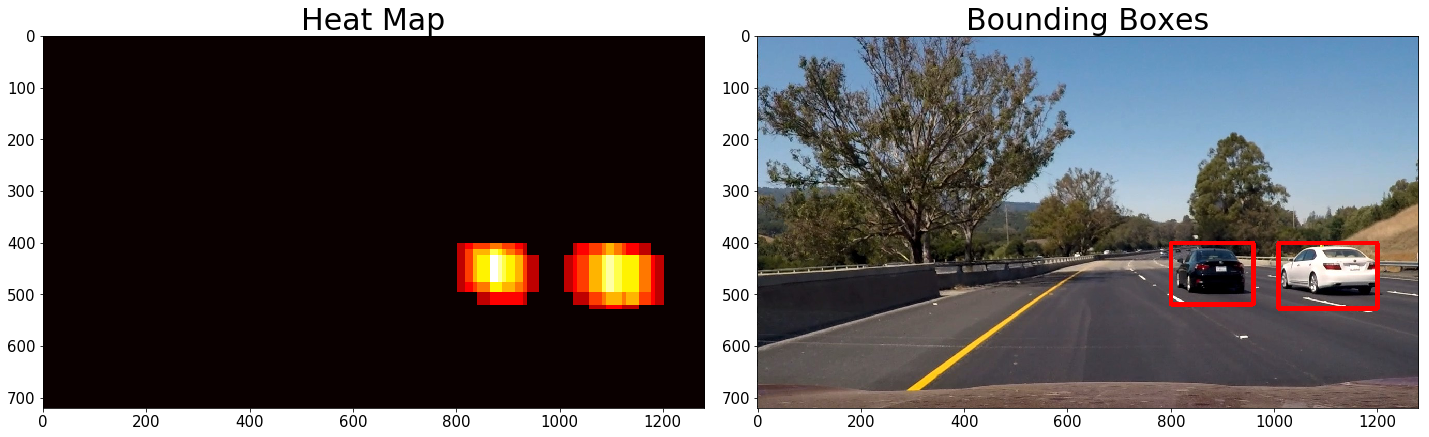
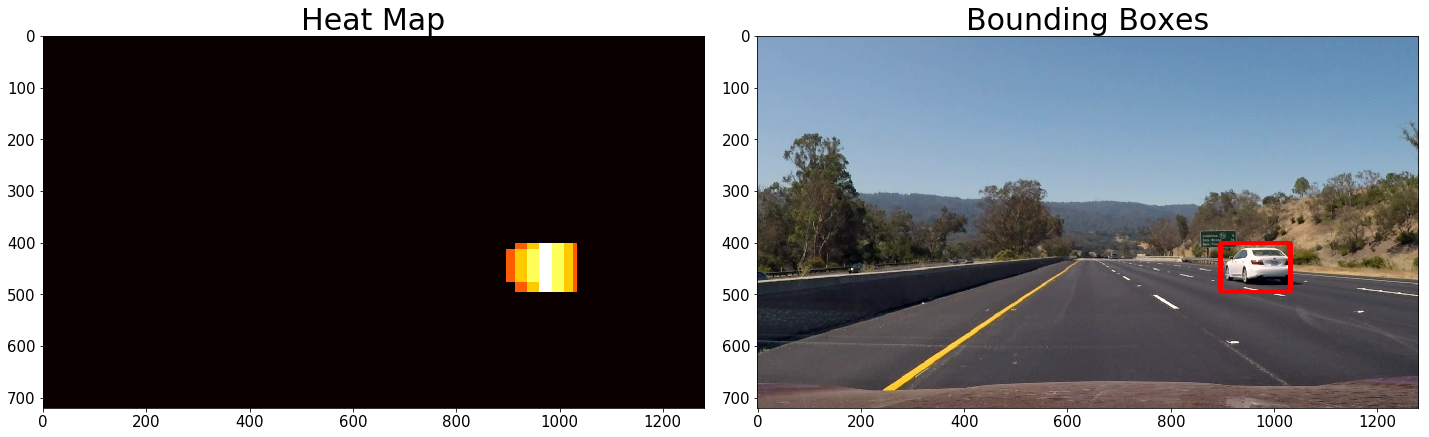
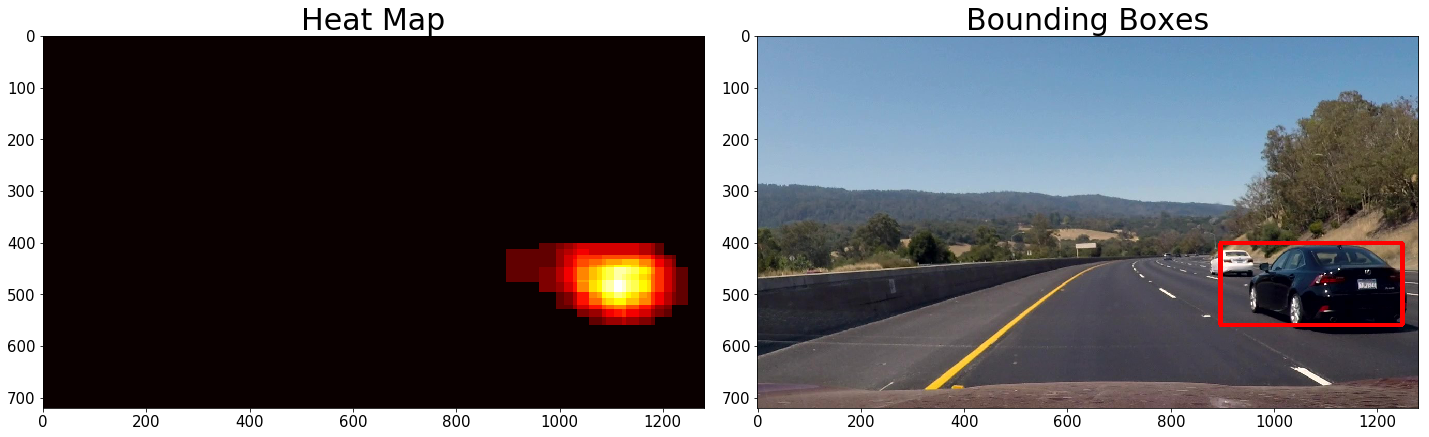

### 11. Extract features using HOG sub-sampling 

The find_cars function suggested in the Udacity modules was applied to efficiently compute the HOG feature of a single frame and sub sample this for each search window. 

This along with scaling was applied to detect cars at multiple distances from the camera. 

The scaling factors used in our case was 1.0, 1.5 and 2.0 for specific ranges of the image regions. 

## Conclusion/Remarks

1. In this project I gained a comprehensive understanding of the color_spaces, features of an image/shape that could be used as features to train a classifier. 

2. I learnt about the various training algorithms, their concepts and implementation with the help of documentation.

3. As can be seen from the project video, the detection box is accurate but erratic. 

The following improvements are required:
1. Implement a class function to smoothen the detection of a vehicle between frames.
2. implement a search algorithm that searches for cars around previous detection regions (similar to Advanced Lane Finding)
3. Optimize the search and sliding window code to reduce processing time and implement at a few frames per second. 
